## **Project: Stock Market Analysis Using Twitter Data**

### **🔍 Objective**

The purpose of this project is to analyze Twitter conversations related to the stock market—particularly around companies like **Tesla, Apple, Amazon, Microsoft, and the SPY ETF**—to understand how public sentiment aligns with stock market behavior. By performing sentiment analysis on relevant tweets, this project aims to uncover patterns in public opinion that may reflect investor mood and market trends.

### **📥 Data Collection**
Tweets were retrieved using the **Twitter API** by querying the hashtag `#StockMarket`. The collected tweets include discussions about the overall market and specific companies, as well as common trading sentiments. The dataset captures both the content and engagement of each tweet, such as retweets and likes.

### **Importing Libraries**

In [ ]:
import tweepy
import pandas as pd

### **Connecting to Twitter API Using Bearer Token**


In [ ]:
# Initializing Tweepy Client for Twitter API Access
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAL0D0AEAAAAAVaybQyI7NZ32U6xwspgMRlsO7V8%3DNuFRl0OYpoIKfLhj0lVQnxMW2xkJufhVUjkbVFyHmkmeZqHIC7'
client = tweepy.Client(bearer_token = bearer_token, wait_on_rate_limit = True)

### **Fetching Tweets From Twitter API**

In [ ]:
# Define the function to fetch tweets
def fetch_tweets(client, query, max_results=60):
    tweets = []

    # Fetch recent tweets based on the query
    response = client.search_recent_tweets(
        query=query + " -is:retweet lang:en",  # Correct way to add language filter
        tweet_fields=['created_at', 'public_metrics', 'author_id', 'text'],
        max_results=max_results
    )

    # Check if the response has data
    if response.data:
        for tweet in response.data:
            tweets.append({
                'created_at': tweet.created_at,
                'text': tweet.text,
                'retweets': tweet.public_metrics['retweet_count'],
                'likes': tweet.public_metrics['like_count']
            })

    # Return a DataFrame with the tweets
    return pd.DataFrame(tweets)

# Define the query for stock-related tweets
query = "#StockMarket"  # Using hashtag for stock-related tweets

# Fetch tweets and store in a DataFrame
tweets_df = fetch_tweets(client, query, max_results=60)

# Check if the DataFrame is empty and print the results
if not tweets_df.empty:
    print(tweets_df)
else:
    print("No tweets were found for the given query.")

### 💾 **Saving Retrieved Tweets to CSV Files**

In [ ]:
# Exporting Retrieved Tweets to CSV Files
tweets_df.to_csv('stock_tweets.csv')
tweets_df2.to_csv('stockmarket_new_tweets.csv')
tweets_df3.to_csv('stockmarket_60new_tweets.csv')
tweets_df4.to_csv('stockmarket_tweets.csv')

The collected tweets were saved into multiple CSV files after being retrieved at different times.

### **Merging Tweet Datasets**

In [ ]:
tweets_df = pd.read_csv('/content/stock_tweets.csv')
tweets_df2 = pd.read_csv('/content/stockmarket_new_tweets.csv')
tweets_df3 = pd.read_csv('/content/stockmarket_60new_tweets.csv')
tweets_df4 = pd.read_csv('/content/stockmarket_tweets.csv')

# Combine them into a single DataFrame
combined_tweets_df = pd.concat([tweets_df, tweets_df2, tweets_df3, tweets_df4], ignore_index=True)

Merged the multiple tweet datasets into one unified DataFrame for easier analysis and processing.

### **Stock Market Tweets Dataset After Merging**

In [ ]:
print(combined_tweets_df.head())

   Unnamed: 0                 created_at  \
0           0  2025-03-25 00:25:17+00:00   
1           1  2025-03-25 00:22:30+00:00   
2           2  2025-03-25 00:20:24+00:00   
3           3  2025-03-25 00:18:48+00:00   
4           4  2025-03-25 00:18:36+00:00   

                                                text  retweets  likes  
0  I told you all #TSLA would rally! A 12% ($30) ...         0      0  
1  🔥 The US stock market soared today, adding $1....         0      0  
2  @Theory_Corps (1999-2002 West Nile Virus) (200...         0      0  
3  Analysis worked perfectly 🔥❤️\n\n#stockmarket ...         0      2  
4  MSTR STOCK PREDICTION (Strategy Stock Price Ac...         0      0  


This dataset includes all the tweets related to stock market discussions about companies like Tesla, Apple, Amazon, Microsoft, and the SPY ETF. The data is combined into one file, with tweet text and engagement metrics (such as retweets and likes), and is ready for cleaning and further analysis.

**📊 Dataset Columns**

**created_at:** Date the tweet was posted

**text:** Original tweet text

**retweets:** Number of times the tweet was retweeted

**likes:** Number of likes

In [ ]:
print(combined_tweets_df.shape)

(180, 5)


Dataset contains 180 rows (tweets) and 5 columns (tweet-related data including created_date, text, engagement metrics such as likes, and retweets).



### **Remove Duplicate Tweets**

In [ ]:
# Remove duplicates (Optional)
combined_tweets_df.drop_duplicates(inplace=True)

In [ ]:
# Save to new CSV (optional)
combined_tweets_df.to_csv("all_stock_tweets_API.csv", index=False)

print("Combined text files saved to 'all_stock_tweets_API.csv'")

# Check result
print(combined_tweets_df.shape)

(180, 5)


### **Most Frequent Words Before Cleaning**

In [ ]:
from collections import Counter
word_freq = Counter(" ".join(combined_tweets_df["text"]).split())
print("Most common words:", word_freq.most_common(20))

Most common words: [('the', 126), ('#StockMarket', 113), ('and', 59), ('a', 51), ('to', 50), ('in', 46), ('is', 44), ('of', 42), ('RT', 36), ('on', 29), ('#stockmarket', 27), ('are', 25), ('#stockmarketcrash', 24), ('The', 22), ('market', 21), ('-', 21), ('#tariffs', 21), ('stock', 20), ('for', 20), ('you', 19)]


### **Text Cleaning**

**For Text Cleaning:**
- **http\S+**: Removes URLs
- **@\S+**: Removes mentions
- **#\S+**: Removes hashtags
- **[^A-Za-z0-9 ]+**: Removes special characters
- **.lower()**: Converts text to lowercase
- **Removing Stopwords**: "the", "is", "and"
- **Lemmatization**: "running" → "run"

In [ ]:
# Download necessary NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In stock-related tweets, symbols like `#` and `$` are used to represent companies and market trends, such as $AMZN for Amazon's stock. These symbols are important for understanding the topic of the tweet and for analyzing market discussions. Removing them would strip away key information about the stock references, which are crucial for our analysis.

### **Text Cleaning Without Removing '$' and '#'**

In [ ]:
# Without Removing '$' and '#'
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs and mentions, but preserve hashtags (#) and dollar signs ($)
    text = re.sub(r'http\S+|www\.\S+|@\S+', '', text)  # Remove URLs and mentions, keep hashtags and $tickers

    # Remove HTML tags (do not remove hashtags and $tickers)
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation (but keep hashtags and $tickers intact)
    text = text.translate(str.maketrans('', '', string.punctuation.replace('#', '').replace('$', '')))

    # Remove numbers and words with numbers, except for stock tickers
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove extra whitespaces and newlines
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization and stopword removal
    stop_words = set(stopwords.words('english'))
    words = text.split()

    # Preserve words starting with # or $ (for stock tickers and hashtags)
    words = [word for word in words if word not in stop_words or word.startswith(('#', '$'))]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

# Example Usage
# Applying the clean_text function to each tweet in the 'text' column
combined_tweets_df["clean_text"] = combined_tweets_df["text"].apply(clean_text)

# Print the cleaned text of the first 20 rows
print(combined_tweets_df[["text", "clean_text"]].head(20))

                                                 text  \
0   I told you all #TSLA would rally! A 12% ($30) ...   
1   🔥 The US stock market soared today, adding $1....   
2   @Theory_Corps (1999-2002 West Nile Virus) (200...   
3   Analysis worked perfectly 🔥❤️\n\n#stockmarket ...   
4   MSTR STOCK PREDICTION (Strategy Stock Price Ac...   
5   RT @Teeka_Tiwari: After a surge in bullish inv...   
6   Oh, very interesting news from Rolls-Royce, ab...   
7   RT @Teeka_Tiwari: Imagine it’s 2007. You’re re...   
8   Love me some $MYNZ! This healthcare diagnostic...   
9   RT @Teeka_Tiwari: If you’re looking to make (a...   
10  Let's see how far #Trump non sense will take u...   
11  SINCE TRUMP TOOK OFFICE, THE U.S. STOCK MARKET...   
12  📉 Wall Street just had its worst day since 202...   
13  Results happen over time, not overnight. Work ...   
14  🚨 Amid Trump’s tariffs, U.S. defense stocks li...   
15  @RpsAgainstTrump .-.\nTRUMP AND THE STOCK MARK...   
16  Coincidence? I don't think 

### **Cleaned Text File**

In [ ]:
# Save the cleaned text to a CSV file
combined_tweets_df[["clean_text"]].to_csv("stockmarket_cleanedtext.csv", index=False)

print("Cleaned text saved to 'stockmarket_cleanedtext.csv'")

Cleaned text saved to 'stockmarket_cleanedtext.csv'


### **Most Frequent Words After Cleaning**

In [ ]:
from collections import Counter
word_freq = Counter(" ".join(combined_tweets_df["clean_text"]).split())
most_common_words = word_freq.most_common(20)
print("Most common words:", most_common_words)

Most common words: [('#stockmarket', 145), ('stock', 45), ('market', 44), ('rt', 36), ('#tariffs', 35), ('$', 28), ('#stocks', 28), ('u', 24), ('#stockmarketcrash', 24), ('#investing', 23), ('#trump', 21), ('tariff', 21), ('trump', 20), ('#trading', 19), ('#bitcoin', 16), ('#trumptariffs', 16), ('#crypto', 15), ('day', 14), ('#gold', 12), ('#', 12)]


### **Visualization using Most Frequent Words (Bar Chart)**


<ipython-input-11-52d54f6d2715>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


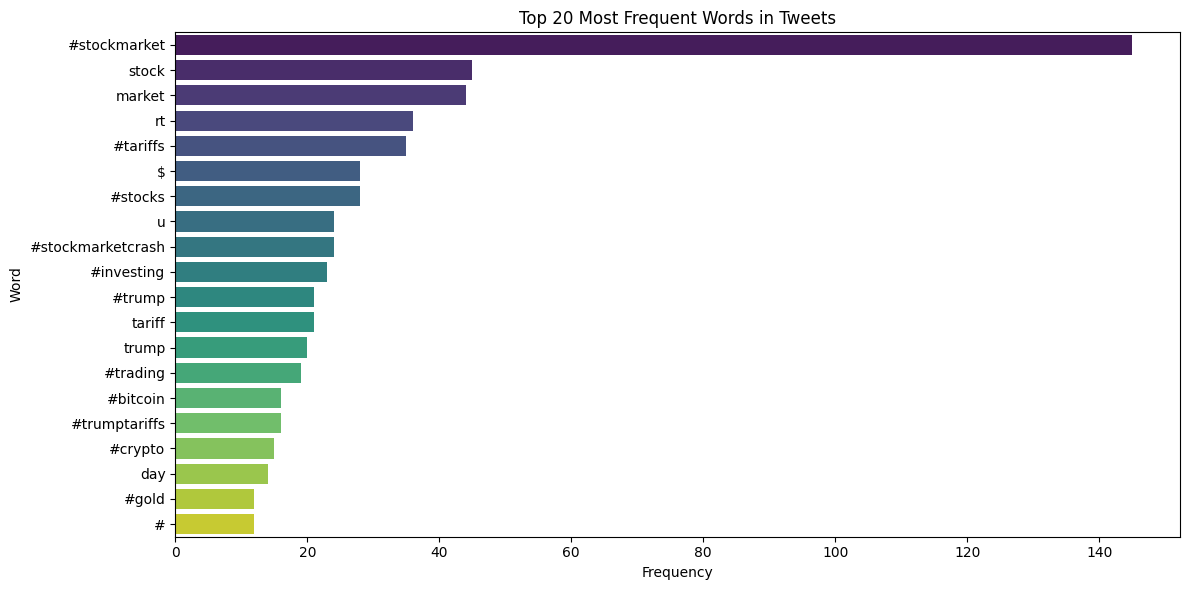

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for plotting
freq_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=freq_df, palette='viridis')
plt.title("Top 20 Most Frequent Words in Tweets")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

The most frequently occurring words in the stock market-related tweets include hashtags like **`#stockmarket`, `#stocks`, and `#market`**, which help identify the key topics being discussed. Other common terms refer to trending issues such as #stockmarketcrash, **`#trump`, `#investing`, and `#trading`**, as well as mentions of assets like **`#bitcoin`, `#crypto`, and `#gold`**. These frequently used words highlight the main themes and discussions within the stock market conversations captured in the tweets.

### **Word Cloud**

In [ ]:
!pip install wordcloud

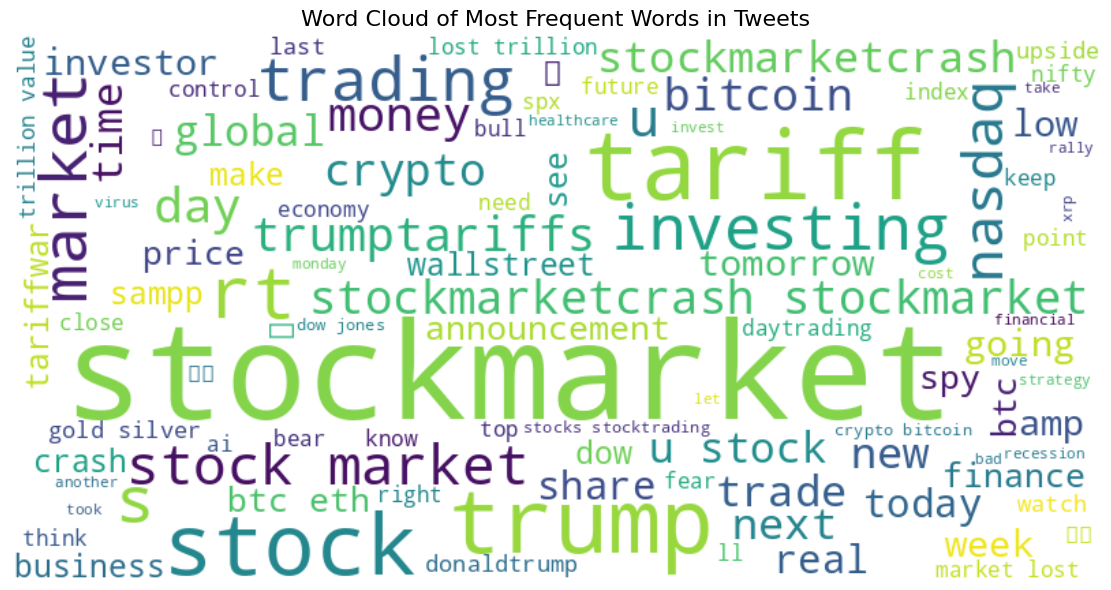

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the clean tweets into one big string
text = " ".join(combined_tweets_df["clean_text"])

# Create the WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',     # Optional: choose any matplotlib colormap
    max_words=100           # Adjust for more/less words
).generate(text)

# Plot it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words in Tweets", fontsize=16)
plt.tight_layout()
plt.show()

This word cloud represents the most frequently used words in tweets related to the stock market. Keywords like **“stockmarket”**, **“tariff”**, “**trump”, “trading”, and “investing**” highlight trending topics and public sentiment. The visualization provides a quick overview of what people are discussing in real time, offering valuable insights for further stock market analysis based on Twitter data.

### **Sentiment Analysis**



### **1. TextBlob Sentiment Analysis**

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

combined_tweets_df["Sentiment"] = combined_tweets_df["clean_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
print(combined_tweets_df["Sentiment"].describe())

count    180.000000
mean       0.023026
std        0.231093
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.069659
max        1.000000
Name: Sentiment, dtype: float64


**Analysis Summary:**
- Total Tweets Analyzed: 180

- Average Sentiment (Mean): ~0.023 → Slightly positive overall.

- Standard Deviation: ~0.231 → There's a fair bit of variation in sentiment.

- Minimum Sentiment Score: -1.0 → Strongly negative tweet(s) present.

- Maximum Sentiment Score: 1.0 → Strongly positive tweet(s) present.

- Median (50%): 0.0 → Half of the tweets are neutral.

- 25th Percentile: 0.0

- 75th Percentile: ~0.07 → Most tweets are clustered between neutral and slightly positive.

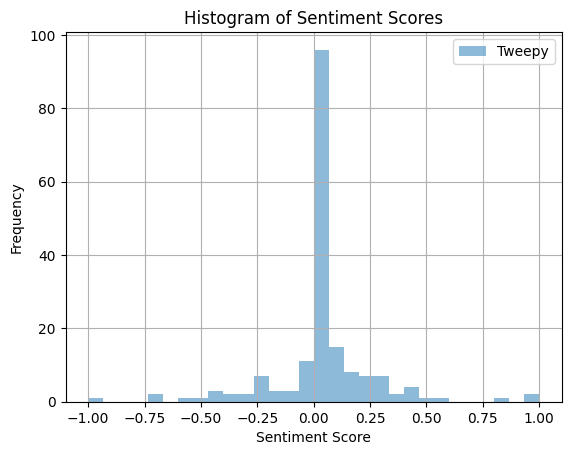

In [ ]:
# Histogram of Sentiment Scores
combined_tweets_df["Sentiment"].hist(bins=30, alpha=0.5, label='Tweepy')
plt.legend()
plt.title("Histogram of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

**Interpretation:**

The sentiment analysis using **TextBlob** shows that most tweets have a neutral tone, with sentiment scores clustered heavily around 0, as seen in the histogram. While there are a few strongly positive or negative tweets (scores near 1.0 or -1.0), the overall distribution suggests minimal emotional intensity in the majority of tweets.

However, this outcome may be influenced by the limitations of **TextBlob**:

- It misses sentiment in social media text that includes slang, emojis, hashtags, and other informal elements.

- It may misinterpret or ignore context, especially with sarcasm, abbreviations, or short expressions commonly found on Twitter.

Because of these limitations, the analysis might not fully capture the true emotional tone of tweets. To address this, moving forward with **VADER** Sentiment Analysis, which is specifically designed for short, informal, and social media-style text.


### **2. VADER Sentiment Analysis**

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.4 MB/s eta 0:00:00


Here I'm using **VADER Sentiment Analysis (Valence Aware Dictionary and sEntiment Reasoner)** to classify the sentiment of tweets in the dataset.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Define a function to classify sentiment
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply to your DataFrame
combined_tweets_df['sentiment'] = combined_tweets_df['clean_text'].apply(get_sentiment)


In [ ]:
combined_tweets_df.head(5)

,Unnamed: 0,created_at,text,retweets,likes,clean_text,Sentiment,sentiment
0,0,2025-03-25 00:25:17+00:00,I told you all #TSLA would rally! A 12% ($30) ...,0,0,told #tsla would rally $ rally trading hour an...,-0.70,negative
1,1,2025-03-25 00:22:30+00:00,"🔥 The US stock market soared today, adding $1....",0,0,🔥 u stock market soared today adding $ trillio...,-0.20,positive
2,2,2025-03-25 00:20:24+00:00,@Theory_Corps (1999-2002 West Nile Virus) (200...,0,0,west nile virus sarscov mumps – virus swine fl...,-0.30,negative
3,3,2025-03-25 00:18:48+00:00,Analysis worked perfectly 🔥❤️\n\n#stockmarket ...,0,2,analysis worked perfectly 🔥❤️ #stockmarket #tr...,1.00,positive
4,4,2025-03-25 00:18:36+00:00,MSTR STOCK PREDICTION (Strategy Stock Price Ac...,0,0,mstr stock prediction strategy stock price act...,0.05,neutral


### **Bar chart of Sentiment counts**

<Axes: xlabel='sentiment'>

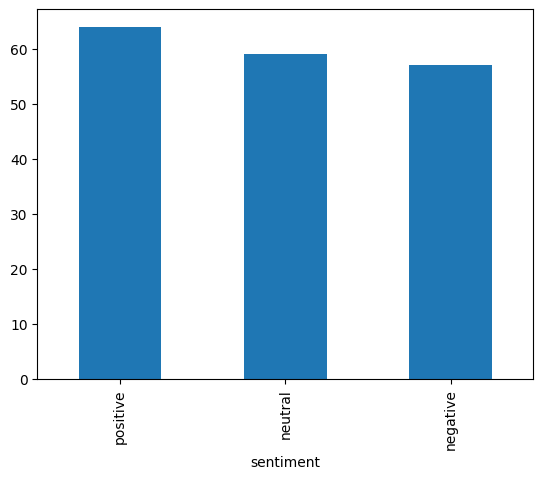

In [ ]:
# Plotting a bar chart showing the number of tweets in each sentiment category
combined_tweets_df['sentiment'].value_counts().plot(kind='bar')

**VADER Sentiment Analysis (Bar Chart)**

- This bar chart shows tweet sentiment using **VADER**, which is designed for social media text. It detects more positive tweets, with neutral and negative sentiments close behind.

- **VADER** outperforms **TextBlob** by handling slang, emojis, and informal language, giving a more accurate picture of public opinion on the stock market.



### Separating Tweets by sentiment (neutral, positive, and negative tweets)

In [ ]:
# Separate tweets by sentiment
positive_tweets = combined_tweets_df[combined_tweets_df['sentiment'] == 'positive']
neutral_tweets = combined_tweets_df[combined_tweets_df['sentiment'] == 'neutral']
negative_tweets = combined_tweets_df[combined_tweets_df['sentiment'] == 'negative']


Here, I wanted to visualize frequent words in each **sentiment group(positive_tweets, neutral_tweets, negative_tweets)** using **WordCloud** of the top terms.

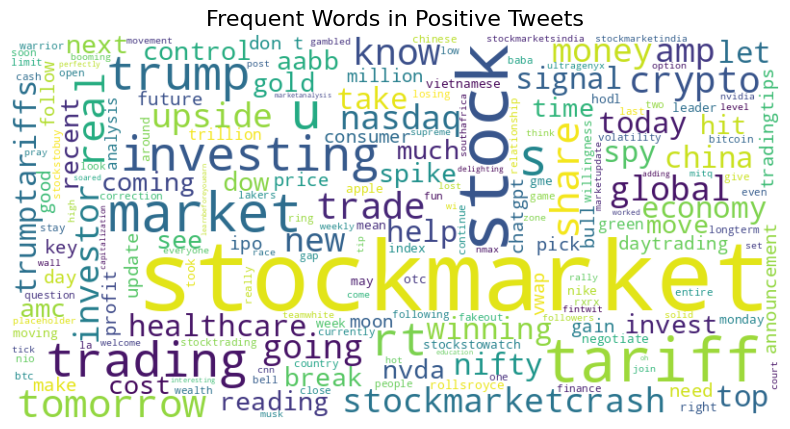

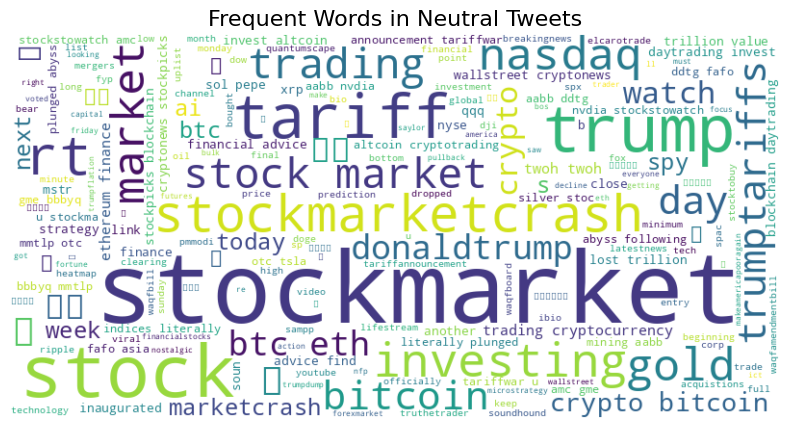

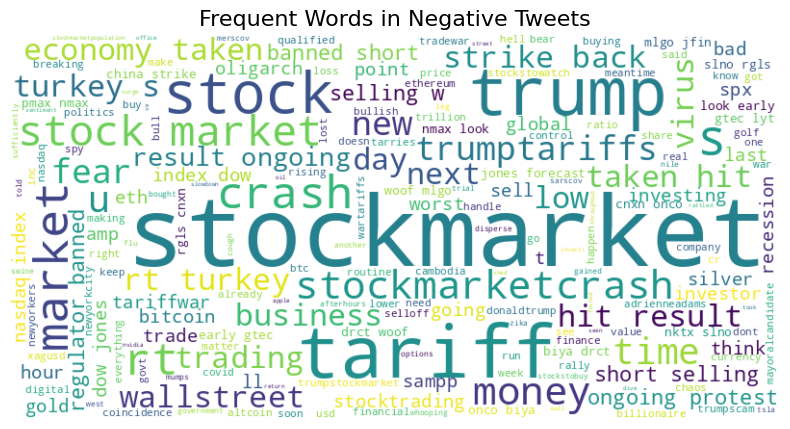

In [ ]:
# Combine all clean_text for each sentiment
positive_words = ' '.join(positive_tweets['clean_text'])
neutral_words = ' '.join(neutral_tweets['clean_text'])
negative_words = ' '.join(negative_tweets['clean_text'])

# Function to create wordcloud
def show_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate wordclouds
show_wordcloud(positive_words, 'Frequent Words in Positive Tweets')
show_wordcloud(neutral_words, 'Frequent Words in Neutral Tweets')
show_wordcloud(negative_words, 'Frequent Words in Negative Tweets')


### **Emotion Analysis Using Lexicon-Based Approach**

In [ ]:
pip install nltk

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary resources from NLTK
nltk.download('opinion_lexicon')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Define a Function for Emotion Analysis

emotion_lexicon = {
    'joy': [
        'gain', 'profit', 'bullish', 'win', 'green', 'soaring', 'surge', 'rally', 'strong',
        'record', 'positive', 'optimistic', 'uptrend', 'stockstobuy', 'invest', 'buythedip',
        '#gain', '#profit', '#bullish', '#win', '#green', '#soaring', '#surge', '#rally', '#strong',
        '#record', '#positive', '#optimistic', '#uptrend', '#stockstobuy', '#invest', '#buythedip'
    ],
    'anger': [
        'fraud', 'scam', 'manipulated', 'rigged', 'corrupt', 'unfair', 'angry', 'mad', 'rage', 'annoyed',
        '#fraud', '#scam', '#manipulated', '#rigged', '#corrupt', '#unfair', '#angry', '#mad', '#rage', '#annoyed'
    ],
    'sadness': [
        'loss', 'lost', 'drop', 'down', 'red', 'slowdown', 'crash', 'stockmarketcrash', 'fall', 'decline',
        'disappointed', 'depressed', 'regret', 'downtrend', 'selloff', 'worst', 'hit',
        '#loss', '#lost', '#drop', '#down', '#red', '#slowdown', '#crash', '#stockmarketcrash',
        '#fall', '#decline', '#disappointed', '#depressed', '#regret', '#downtrend', '#selloff'
    ],
    'fear': [
        'fear', 'scared', 'panic', 'nervous', 'uncertain', 'volatility', 'risky', 'warning',
        'concern', 'bearish', 'doubt', 'recession', 'losing',
        '#fear', '#scared', '#panic', '#nervous', '#uncertain', '#volatility', '#risky',
        '#warning', '#concern', '#bearish', '#doubt', '#recession', '#losing'
    ],
    'surprise': [
        'unexpected', 'shock', 'surprised', 'amazement', 'jump', 'plummet', 'news', 'announcement', 'earningssurprise',
        '#unexpected', '#shock', '#surprised', '#amazement', '#jump', '#plummet', '#news', '#announcement', '#earningssurprise'
    ],
    'trust': [
        'confidence', 'believe', 'support', 'faith', 'trust', 'solid', 'stable', 'resilient',
        '#confidence', '#believe', '#support', '#faith', '#trust', '#solid', '#stable', '#resilient'
    ]
}


# Define the emotion classification function
def classify_emotion(text):
    # Tokenize and clean the text
    words = word_tokenize(text.lower())  # Convert to lowercase
    words = [word for word in words if word.isalnum()]  # Remove punctuation
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]  # Remove stopwords

    # Initialize emotion scores
    emotion_scores = {emotion: 0 for emotion in emotion_lexicon}

    # Count matching words for each emotion
    for word in words:
        for emotion, emotion_words in emotion_lexicon.items():
            if word in emotion_words:
                emotion_scores[emotion] += 1

    # Determine the dominant emotion (or 'none' if all are 0)
    if all(score == 0 for score in emotion_scores.values()):
        return 'none', 0
    else:
        max_emotion = max(emotion_scores, key=emotion_scores.get)
        return max_emotion, emotion_scores[max_emotion]

# Apply the function to the DataFrame
combined_tweets_df[['emotion', 'emotion_score']] = combined_tweets_df['clean_text'].apply(
    lambda text: pd.Series(classify_emotion(text))
)

# Display results
print(combined_tweets_df[['clean_text', 'emotion', 'emotion_score']].head(50))


                                           clean_text   emotion  emotion_score
0   told #tsla would rally $ rally trading hour an...       joy              4
1   🔥 u stock market soared today adding $ trillio...       joy              1
2   west nile virus sarscov mumps – virus swine fl...      none              0
3   analysis worked perfectly 🔥❤️ #stockmarket #tr...      none              0
4   mstr stock prediction strategy stock price act...      none              0
5   rt surge bullish investor sentiment throughout...       joy              2
6   oh interesting news rollsroyce potentially mov...       joy              1
7   rt imagine it’s you’re reading newspaper see a...      none              0
8   love $mynz healthcare diagnostic stock bad mon...      none              0
9   rt you’re looking make keep fortune market pul...      none              0
10  let see far #trump non sense take u importantl...      fear              1
11  since trump took office u stock market lost $ ..

To understand the emotional tone behind stock-related tweets, a custom emotion lexicon was created with categories like **joy, anger, sadness, fear, surprise, and trust**. Each tweet is analyzed by matching keywords to these categories using tokenization and filtering techniques.

The function then classifies each tweet by its dominant emotion, assigning a corresponding score based on keyword matches. This helps uncover not just sentiment, but the underlying emotions driving public opinion around the stock market.

### **Visualizing the Tweet Counts by Emotion (Joy, Anger, Sadness, Fear, Surprise, Trust)**

<ipython-input-44-c87baf831e5c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




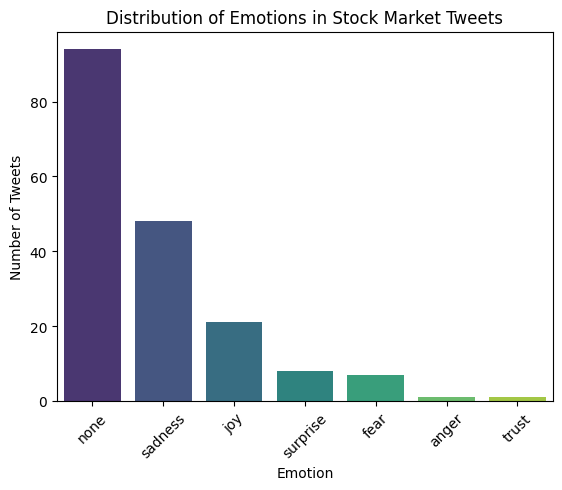

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

emotion_counts = combined_tweets_df['emotion'].value_counts()
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.title('Distribution of Emotions in Stock Market Tweets')
plt.xlabel('Emotion')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()


**Interpretation: Distribution of Emotions in Stock Market Tweets**

The majority of tweets are labeled with **"none"**, meaning they did not contain strong emotional keywords from the defined lexicon. This is common in financial tweets, which are often factual or analytical.

Among the emotionally tagged tweets:

- **Sadness** is the most common emotion, indicating concern about losses, crashes, or downtrends.

- **Joy** follows, reflecting optimism about gains, rallies, or bullish trends.

Emotions like **surprise, fear, anger, and trust** are less frequent but still present, showing a diverse emotional reaction to stock market events.

Overall, this suggests that while most tweets are **neutral** in tone, there's a clear emotional pull toward **sadness and joy**, driven by market performance and public sentiment.

### **Visualizing Popular Stock Names (Cashtags and Hashtags)**

### **Extracting Stock Mentions from Tweets**



In [ ]:
import re
from collections import Counter

# Combine all tweets into one big string
all_text = ' '.join(combined_tweets_df['clean_text'].tolist())

# Use regex to extract all words starting with $ or #
stock_mentions = re.findall(r'[\$#][A-Za-z0-9]+', all_text)

# Count the frequency of each mention
mention_counts = Counter(stock_mentions)

# Convert to a DataFrame for plotting
mention_df = pd.DataFrame(mention_counts.items(), columns=['symbol', 'count'])

# Top 100
mention_df = mention_df.sort_values(by='count', ascending=False).head(100)


Using regular expressions, tweets were scanned to identify stock-related mentions marked with **`$` (e.g., $AAPL) or `#` (e.g., #Tesla)**. The top 100 most frequently mentioned tickers and hashtags were extracted and counted, providing insights into which stocks or market topics are getting the most attention on Twitter.

### **Top Mentioned Stock Names (Bar Chart)**


<ipython-input-66-b2df47206c18>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




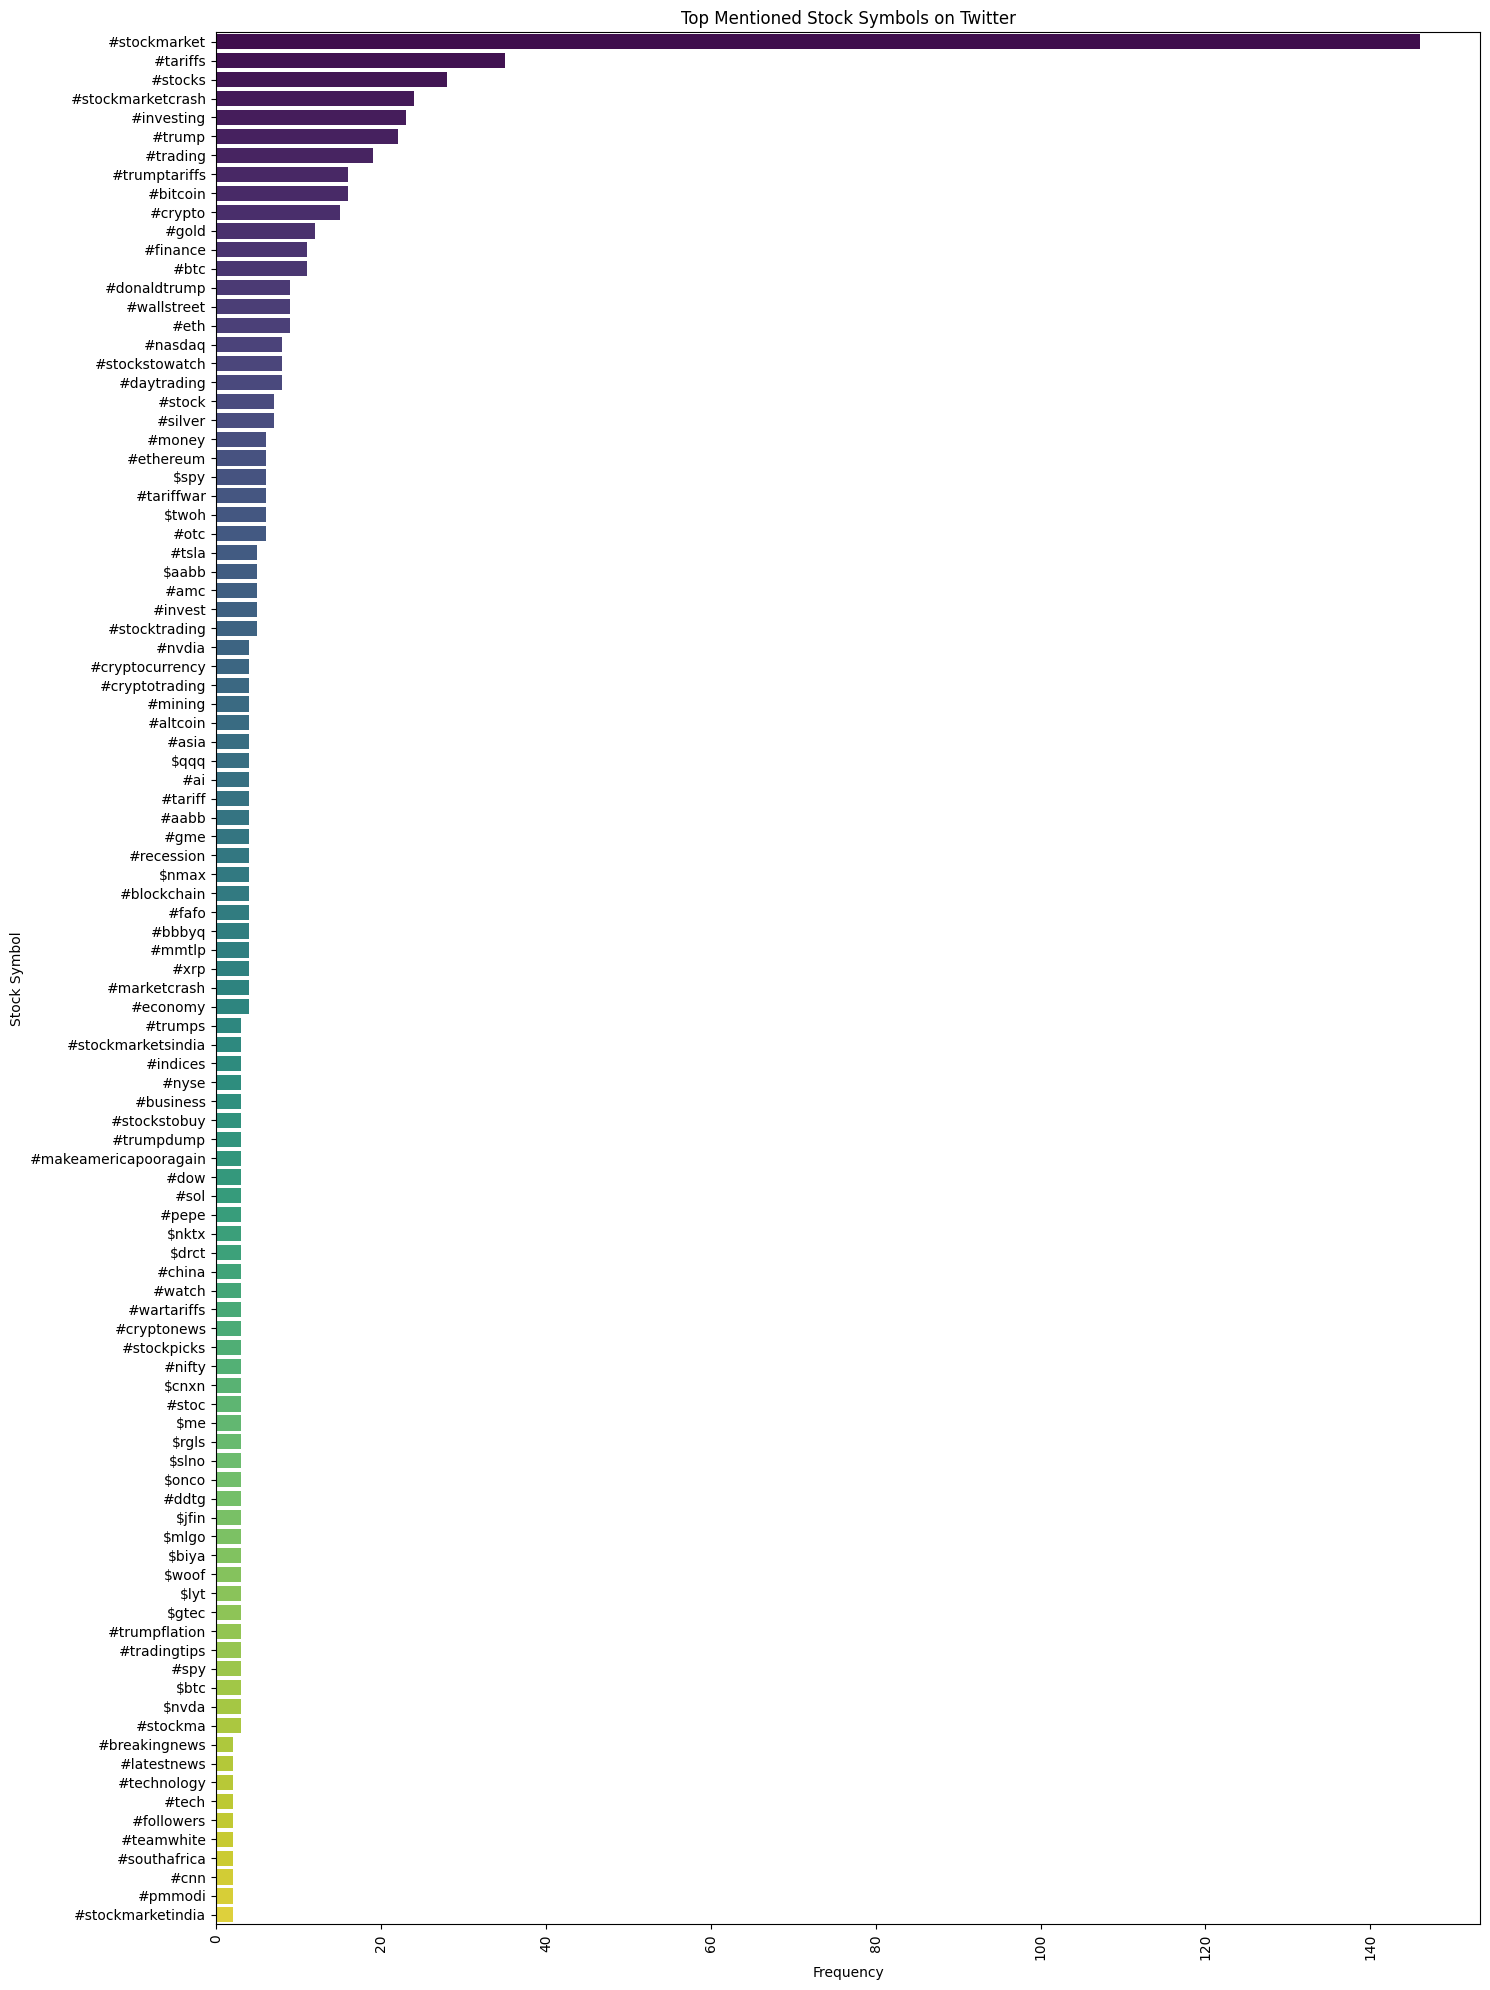

In [ ]:
# Vertical Bar Chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
sns.barplot(data=mention_df, x='count', y= 'symbol', palette='viridis')
plt.title('Top Mentioned Stock Symbols on Twitter')
plt.xlabel('Frequency')
plt.ylabel('Stock Symbol')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This horizontal bar chart displays the **most frequently mentioned stock-related hashtags and symbols** from Twitter data.

- **#stockmarket, #tariffs, and #stocks** top the list, indicating heavy discussion around broad market movements and economic policies.

- Other high-frequency mentions include **#stockmarketcrash, #investing,** and popular tickers like **#bitcoin, #tesla, #gold, #eth, #nasdaq and #aapl**.

This visualization helps identify trending topics and the most discussed companies or assets, providing valuable context for sentiment and market analysis.

<ipython-input-61-d96c084b4b28>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




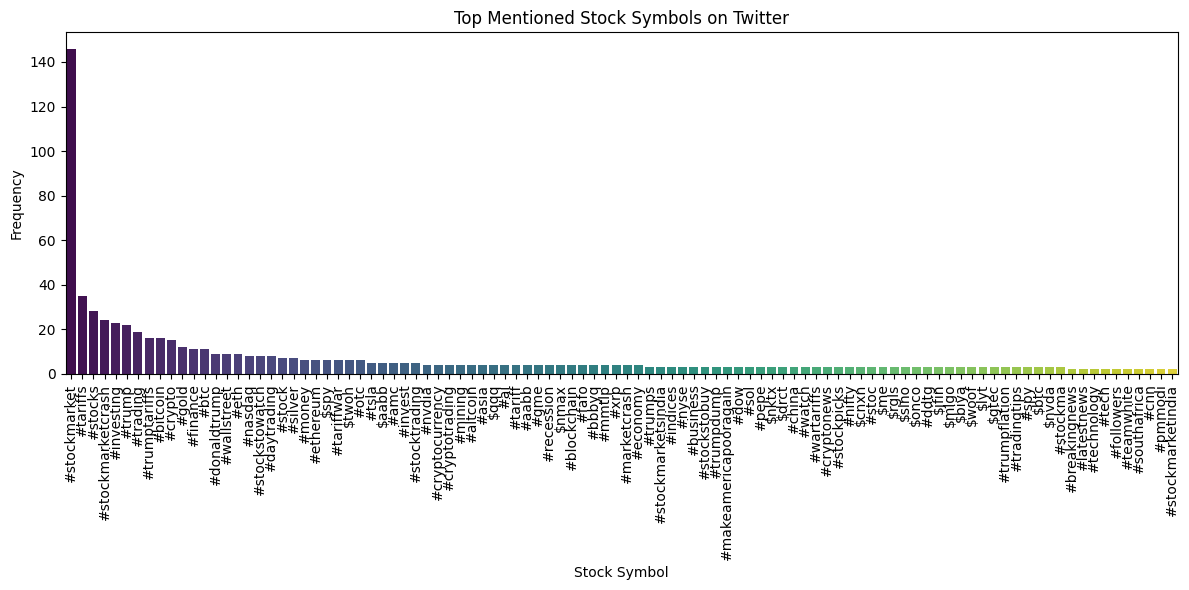

In [ ]:
# Horizontal Bar Chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=mention_df, x='symbol', y='count', palette='viridis')
plt.title('Top Mentioned Stock Symbols on Twitter')
plt.xlabel('Stock Symbol')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Word Cloud of Stock Mentions**

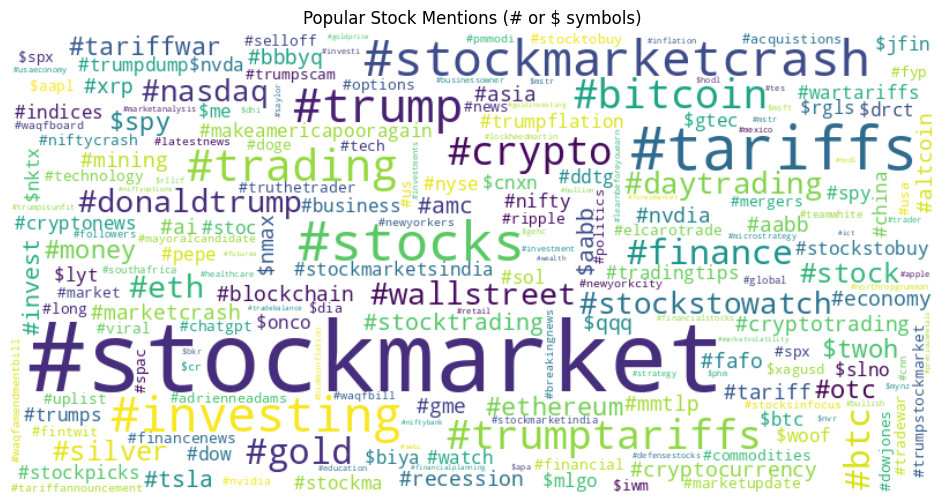

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(mention_counts)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Stock Mentions (# or $ symbols)')
plt.show()


The presence of both company-specific symbols **(like btc, $tsla, $aapl)** and broad market terms **(like #stockmarketcrash, #crypto, #daytrading)** shows a mix of general market sentiment and focus on individual assets.

This visualization gives a quick snapshot of where public attention is focused in the financial world on social media.



### Synthetic Tweets Using GPT-2 Model

In [1]:
import torch  # Required for PyTorch backend
from transformers import pipeline # For text generation model

# Set device (0 for GPU, -1 for CPU)
device = 0

# Load the MetaIX/GPT4-X-Alpasta-30b model
generator = pipeline("text-generation", model = "gpt2", device = device)
# generator = pipeline("text-generation", model="distilgpt2", device=device)
# generator = pipeline("text-generation", model="MetaIX/GPT4-X-Alpasta-30b", device=device)


def generate_tweets(prompt, num_tweets = 5):
    return generator(prompt, max_length=50, num_return_sequences = num_tweets)

prompt = "Generate a tweet about stocks and SPY ETF"

synthetic_tweets = generate_tweets(prompt, 1000)

# Print Generated Tweets
for tweet in synthetic_tweets:
    print(tweet["generated_text"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generate a tweet about stocks and SPY ETFs on the Google+ page https://plus.google.com/+Google/+Instagram for a short duration, followed by a link to the tweet's location on that page.

With these
Generate a tweet about stocks and SPY ETFs. Click here.

You can learn how to create a Twitter account by clicking here.

Click here to create an automated account with Facebook

Create a profile

After you
Generate a tweet about stocks and SPY ETFs in your newsfeed.

As you scroll through our story for the past couple of weeks, you can see that the shares that were sold yesterday in C.P.C.U.
Generate a tweet about stocks and SPY ETF.

In a nutshell, this lets you choose the company you like best.

Let's think about what makes the next round of buy and sell decisions especially appealing - how do you get
Generate a tweet about stocks and SPY ETFs

You can also create your own account by pressing the button in this screenshot to use the link in a future email for the verification or to submit 

### **Save to a .csv file using pandas**

In [2]:
import pandas as pd

# Convert to DataFrame
tweet_texts = [tweet["generated_text"] for tweet in synthetic_tweets]
df = pd.DataFrame(tweet_texts, columns=["tweet"])

# Save to CSV
df.to_csv("synthetic_tweets.csv", index=False, encoding="utf-8")


In [5]:
import pandas as pd
import re

# Step 1: Load the CSV file
synthetic_tweets_df = pd.read_csv("synthetic_tweets.csv")  # make sure the file is uploaded
synthetic_tweets_df.head(20)

,tweet
0,Generate a tweet about stocks and SPY ETFs on ...
1,Generate a tweet about stocks and SPY ETFs. Cl...
2,Generate a tweet about stocks and SPY ETFs in ...
3,Generate a tweet about stocks and SPY ETF.\n\n...
4,Generate a tweet about stocks and SPY ETFs\n\n...
5,Generate a tweet about stocks and SPY ETF from...
6,Generate a tweet about stocks and SPY ETFs – b...
7,Generate a tweet about stocks and SPY ETFs on ...
8,Generate a tweet about stocks and SPY ETF.\n\n...
9,Generate a tweet about stocks and SPY ETFs at ...


In [7]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re

# Step 2: Define the cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r'@\w+', "", text)  # Remove mentions
    text = re.sub(r'#', "", text)  # Remove hashtag symbols (keep the word)
    text = re.sub(r'[^a-z\s]', "", text)  # Remove punctuation and numbers
    text = re.sub(r'\s+', " ", text).strip()  # Remove extra spaces
    return text

# Step 3: Apply cleaning to tweet column
synthetic_tweets_df['cleaned_tweet'] = synthetic_tweets_df['tweet'].astype(str).apply(clean_text)

# Step 4: Save or view cleaned tweets
synthetic_tweets_df.to_csv("cleaned_synthetic_tweets.csv", index=False)
synthetic_tweets_df[['tweet', 'cleaned_tweet']].head()


,tweet,cleaned_tweet
0,Generate a tweet about stocks and SPY ETFs on ...,generate a tweet about stocks and spy etfs on ...
1,Generate a tweet about stocks and SPY ETFs. Cl...,generate a tweet about stocks and spy etfs cli...
2,Generate a tweet about stocks and SPY ETFs in ...,generate a tweet about stocks and spy etfs in ...
3,Generate a tweet about stocks and SPY ETF.\n\n...,generate a tweet about stocks and spy etf in a...
4,Generate a tweet about stocks and SPY ETFs\n\n...,generate a tweet about stocks and spy etfs you...
